In [1]:
import meshposition as mp
import utils as utl
import numpy as np
import matplotlib.pyplot as plt
import analyse_utils as atl

In [2]:
# can optionally be called for capture, must be followed by mp.stop() to close the serial port
mp.start()

uart> device with serial 000760129940 found at COM35
uart> COM35 : is Open


mp>serial thread started


In [11]:
#needed in case nodes output traffic on the channel e.g. when switching off and on
mp.clear()

clearing 0 entries


# RF Diagnosis

In [4]:
node_ids = mp.rf_get_active_short_ids()
utl.save_json_timestamp("config_twr",node_ids)

(RR) : (4)/(E2F96EB1D7A476CC)
(Green) : (3)/(530BE91D3559D690)
(RL) : (1)/(CBC216DC164B1DE8)
(Simple) : (2)/(5F7D70F99F462C99)
4 entries saved in ./test_db/config_twr 2021.08.01 15-17-53.json


'./test_db/config_twr 2021.08.01 15-17-53.json'

In [5]:
mp.test_rf_ping_rssi("RR", 1)
mp.test_rf_ping_rssi("RL", 1)
mp.test_rf_ping_rssi("Simple", 1)
mp.test_rf_ping_rssi("Green", 1)

test_ping(0)> rssi = 70
test_ping(0)> rssi = 58
test_ping(0)> rssi = 64
test_ping(0)> rssi = 69


# Ranging

No or not enough responses receveid(197) / expected(200)
{'error': 'mp_receive_1_failed', 'initiator': 'Green', 'responder': 'Simple', 'seq': 8}


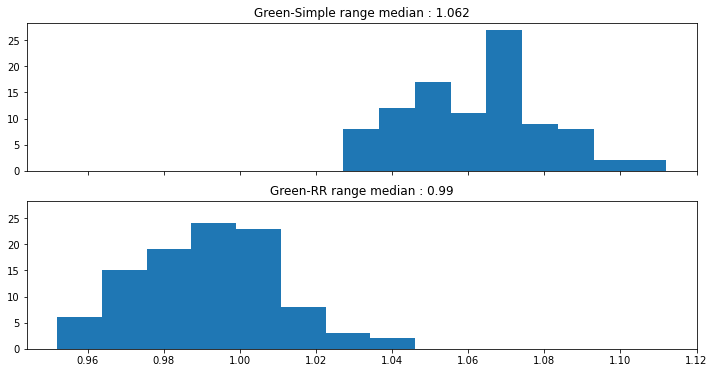

In [9]:
twr_list = mp.uwb_twr(initiator="Green", responders=["Simple","RR"], step_ms=10, count=100, count_ms=30)
atl.plot_twr_list([("Green","Simple"),("Green","RR")], twr_list)

No or not enough responses receveid(196) / expected(200)


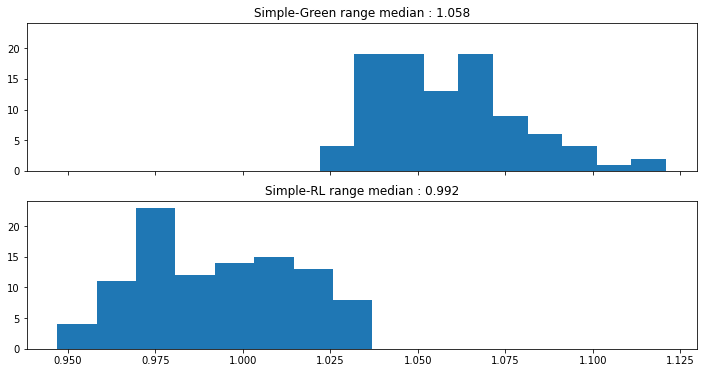

In [12]:
twr_list = mp.uwb_twr(initiator="Simple", responders=["Green","RL"], step_ms=10, count=100, count_ms=30)
atl.plot_twr_list([("Simple","Green"),("Simple","RL")], twr_list)

No or not enough responses receveid(198) / expected(200)


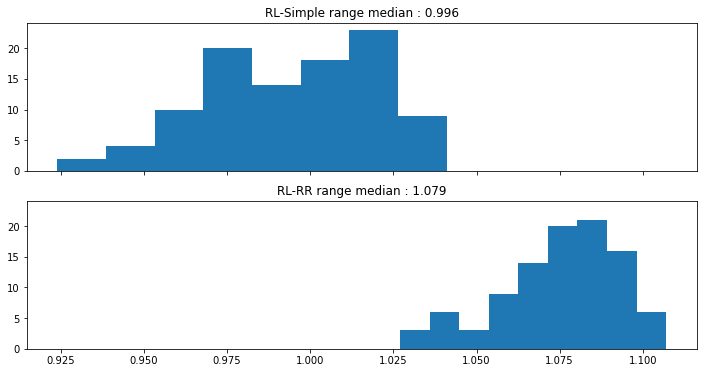

In [13]:
twr_list = mp.uwb_twr(initiator="RL", responders=["Simple","RR"], step_ms=10, count=100, count_ms=30)
atl.plot_twr_list([("RL","Simple"),("RL","RR")], twr_list)

No or not enough responses receveid(198) / expected(200)
{'error': 'twr_3_final_failed', 'initiator': 'RR', 'responder': 'Green', 'seq': 50}


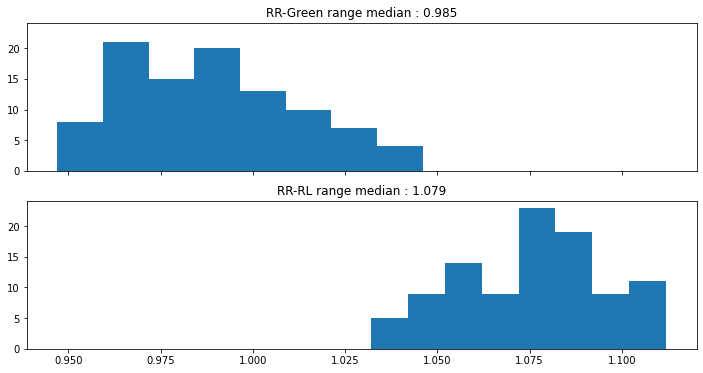

In [14]:
twr_list = mp.uwb_twr(initiator="RR", responders=["Green","RL"], step_ms=10, count=100, count_ms=30)
atl.plot_twr_list([("RR","Green"),("RR","RL")], twr_list)

In [9]:
mp.stop()

closing serial port
uart> COM35 : is Closed
